# Heart Disease Dataset Analysis

Laura Flannigan, Kaitlyn Harvie, Hannah Morstead, & Tony Tang 

**Introduction**

   According to the World Health Organization, the leading cause of death worldwide remains as cardiovascular diseases (2021). However, heart disorders can be preventable, as research has revealed various risk factors in the development of such diseases. Yusuf et al. (2001) suggest that high blood pressure and increased LDL cholesterol levels show causal links to cardiovascular disease. Additionally, the presence of chest pain has been shown to be associated with increased risk of long-term cardiovascular disease (Robson et al., 2015), as well as ECT abnormalities which are suggestive of an increased risk of heart disease (Whincup, 1995). Gender and age differences contribute to risk factors (Mass & Appleman, 2010).
   
   Using the Heart Disease Dataset from the Cleveland Clinic Foundation, we will determine how accurately a classification model, using criterion variables; age, sex, chest pain type, resting blood pressure, blood cholesterol levels, resting ECT results, and presence of exercise-indudced angina, correctly predict the presence of heart disease for a new observation.

**Preliminary Exploratory Data Analysis**

In [86]:
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 6)

url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
download.file(url, "data/processed_cleveland.csv")
cleveland_data <- read_csv("data/processed_cleveland.csv", col_names = c("age", "sex", "cp_type", "resting_bp",
                           "cholesterol", "fasting_bs", "ECG_results", "max_pulse", "exercise_ang", "ST_depress",
                           "slope_ST", "fluoroscopy", "thal", "diagnosis"), na = "?") %>%
    mutate(sex = as_factor(sex)) %>%
    mutate(cp_type = as_factor(cp_type)) %>%
    mutate(fasting_bs = as_factor(fasting_bs)) %>%
    mutate(ECG_results = as_factor(ECG_results)) %>%
    mutate(exercise_ang = as_factor(exercise_ang)) %>%
    mutate(slope_ST = as_factor(slope_ST)) %>%
    mutate(fluoroscopy = as_factor(fluoroscopy)) %>%
    mutate(thal = as_factor(thal)) %>%
    mutate(diagnosis = as_factor(diagnosis))
cleveland_data

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp_type = col_double(),
  resting_bp = col_double(),
  cholesterol = col_double(),
  fasting_bs = col_double(),
  ECG_results = col_double(),
  max_pulse = col_double(),
  exercise_ang = col_double(),
  ST_depress = col_double(),
  slope_ST = col_double(),
  fluoroscopy = col_double(),
  thal = col_double(),
  diagnosis = col_double()
)



age,sex,cp_type,resting_bp,cholesterol,fasting_bs,ECG_results,max_pulse,exercise_ang,ST_depress,slope_ST,fluoroscopy,thal,diagnosis
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
57,0,2,130,236,0,2,174,0,0.0,2,1,3,1
38,1,3,138,175,0,0,173,0,0.0,1,NA,3,0


- age: age in years
- sex: sex (1 = male; 0 = female)
- cp_type: chest pain type (1: typical angina; 2: atypical angina; 3: non-anginal pain; 4: asymptomatic)
- resting_bp: resting blood pressure upon admission to hospital (mm Hg)
- cholesterol: blood cholesterol content (mg/dl)
- fasting_bs: fasting blood sugar greater than 120 mg/dl (1 = true; 0 = false)
- ECG_results: resting ECG results (0: normal; 1: ST-T wave abnormality; 2: left ventricular hypertrophy)
- max_pulse: maximum heart rate achieved
- exercise_ang: exercise induced angina (1 = yes; 0 = no)
- ST_depress: ST depression induced by exercise relative to rest
- slope_ST: slope of the peak exercise ST segment (1: upsloping; 2: flat; 3: downsloping)
- fluoroscopy: # of major vessels (0-3) coloured by fluoroscopy
- thal: unknown variable with values 3 = normal, 6 = fixed defect, 7 = reversable defect
- diagnosis: diagnosis of heart disease (0 = healthy; 1-4 = afflicted)

In [87]:
set.seed(1248)

cleveland_data <- cleveland_data %>%
    select(age, sex, cp_type, resting_bp, cholesterol, ECG_results, exercise_ang, diagnosis)
cleveland_split <- initial_split(cleveland_data, prop = 3/4, strata = diagnosis)
cleveland_train <- training(cleveland_split)
cleveland_test <- testing(cleveland_split)
cleveland_train

age,sex,cp_type,resting_bp,cholesterol,ECG_results,exercise_ang,diagnosis
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>
63,1,1,145,233,2,0,0
67,1,4,160,286,2,1,2
41,0,2,130,204,2,0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,1,3
57,0,2,130,236,2,0,1
38,1,3,138,175,0,0,0


In [91]:
class_count <- cleveland_train %>%
    group_by(diagnosis) %>%
    summarize(count = n())
class_count

`summarise()` ungrouping output (override with `.groups` argument)



diagnosis,count
<fct>,<int>
0,126
1,40
2,28
3,27
4,8


In [97]:
predictors_mean <- cleveland_train %>%
    select(-diagnosis) %>%
    map_df(mean, na.rm = TRUE)
predictors_mean

Warning message in mean.default(.x[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(.x[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(.x[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(.x[[i]], ...):
“argument is not numeric or logical: returning NA”


age,sex,cp_type,resting_bp,cholesterol,ECG_results,exercise_ang
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
55.15284,NA,NA,132.4017,248.4847,NA,NA


Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


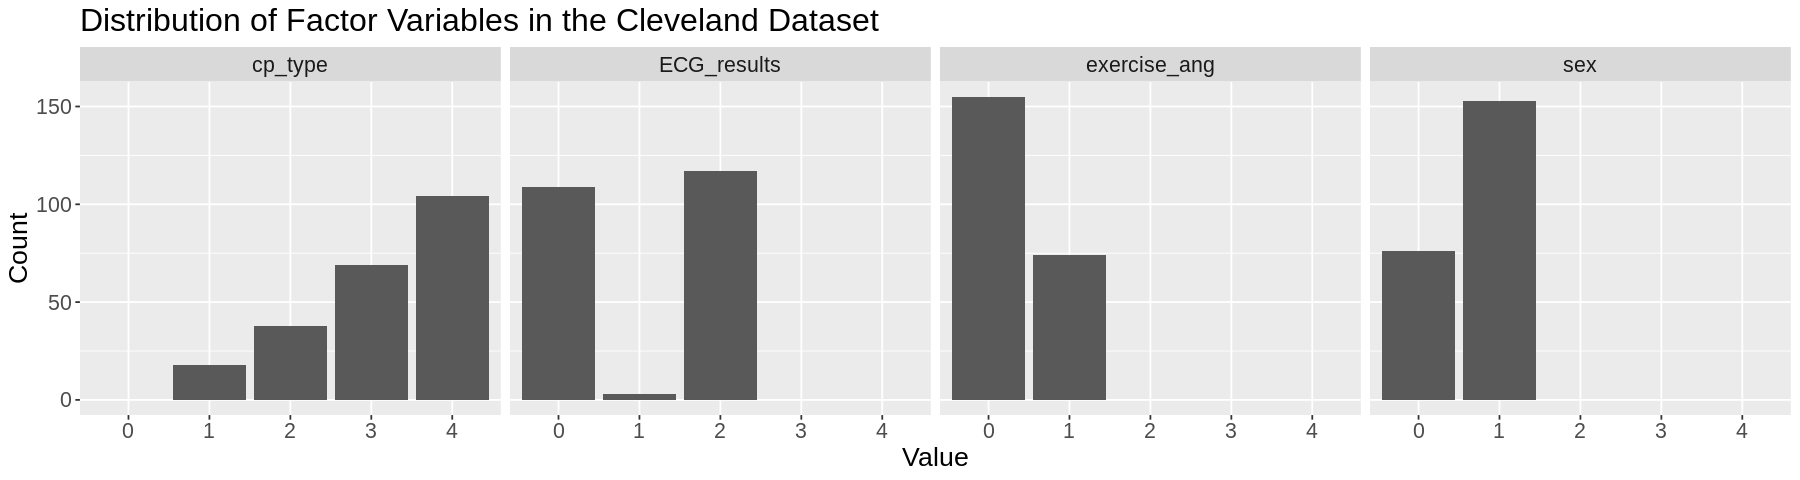

In [96]:
factor_predictors <- cleveland_train %>%
    select(sex, cp_type, ECG_results, exercise_ang) %>%
    mutate(patient = c(1:pull(count(cleveland_train)))) %>%
    pivot_longer(cols = sex:exercise_ang, names_to = "predictor", values_to = "value")

options(repr.plot.width = 15, repr.plot.height = 4)
predictors_distr <- ggplot(factor_predictors, aes(x = value)) +
    geom_histogram(stat="count") +
    facet_wrap(~c(predictor), nrow = 1) +
    ggtitle("Distribution of Factor Variables in the Cleveland Dataset") +
    labs(x = "Value", y = "Count") +
    theme(text = element_text(size=16))
predictors_distr

**Methods**

**Expected Outcomes and Significance**

We expect our final classification model to be able to accurately predict the presence and severity of heart disease in a new patient based.  The classification model will be able to make accurate predictions majority of the time, which can aid the diagnosis process. By being able to predict the severity of heart disease based on related predictors the classification model can help identify patients with less severe heart disease. This will be beneficial to aid in preventative treatments to slow the progression of heart disease in such patients. Through the use of the classification model, some questions may arise such as, which predictors relate the most to the severity of heart disease? And is there one predictor that is stronger than others in accurately predicting the presence of heart disease?

References

World Health Organization. (2021). Cardiovascular Diseases (CVDs). Retreived from https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds) 

Yusuf, S., Reddy, S., Ounpuu, S. & Anand, S. (2001) Global Burden of Cardiovascular Diseases: Part I: General Considerations, the Epidemiologic Transition, Risk Factors, and Impact of Urbanization. Circulation, 104, 2746-2753. https://doi.org/10.1161/hc4601.099487

Robson, J., Ayerbe, L., Mathur, R., Addo, J., & Wragg, A. (2015). Clinical value of chest pain presentation and prodromes on the assessment of cardiovascular disease: a cohort study. BJM Open, 5, 1-6. doi: 10.1136/bmjopen-2014-007251 

Whincup, P. H., Wannamethee, G., Macfarlane, P. W., Walker, M. & Shaper, G. A. (1995). Resting electrocardiogram and risk of coronary heart disease in middle-ages British men. Journal of Cardiovascular Risk, 2, 533-543. https://doi.org/10.1177/174182679500200608


Maas, A. H. E. M. & Appelman, Y. E. A. (2011). Gneder differences in coronary heart disease. Netherlands Heart Journal, 18, 589 - 602. doi: 10.1007/s12471-010-0841-y 